# Notebook initialization

## Selecting best GPU

In [1]:
import os
os.environ['PYTHONHASHSEED'] = '0'
import gpustat

stats = gpustat.GPUStatCollection.new_query()
ids = map(lambda gpu: int(gpu.entry['index']), stats)
ratios = map(lambda gpu: float(gpu.entry['memory.used'])/float(gpu.entry['memory.total']), stats)
bestGPU = 1#min(zip(ids, ratios), key=lambda x: x[1])[0]

print("setGPU: Setting GPU to: {}".format(bestGPU))
os.environ['CUDA_DEVICE_ORDER'] = 'PCI_BUS_ID'
os.environ['CUDA_VISIBLE_DEVICES'] = str(bestGPU)

setGPU: Setting GPU to: 1


##  Global variables

In [9]:
# IPython extension to reload modules before executing user code.
# 'autoreload' reloads modules automatically before entering the execution of code typed at the IPython prompt.
%load_ext autoreload
%autoreload 2
import sys
sys.path.insert(0, "../")

simulation_id = 6
weights_id = 4

weights_path = lambda name: '../weights/{}/{}/'.format(weights_id, name)
dw_path = lambda name: 'dw/{}/{}'.format(5, name)
figures_path = lambda name: 'figures/{}/{}/'.format(simulation_id, name)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Seed initialization (for reproductible results)

In [3]:
# Setting the seed for NumPy generated random numbers
import numpy as np
np.random.seed(0)

# Setting the seed for Python random numbers
import random as rn
rn.seed(0)

# Setting the seed for TensorFlow random numbers
import tensorflow as tf
tf.set_random_seed(0)

#from keras.backend.tensorflow_backend import set_session
#config = tf.ConfigProto()
#config.gpu_options.per_process_gpu_memory_fraction = 0.333
#set_session(tf.Session(config=config))

# Importing weights

In [4]:
from models import VGG16_beta
import numpy as np
import keras
import matplotlib.pyplot as plt
from collections import defaultdict
from numpy.linalg import norm
import itertools
from keras_utils import get_kernel_layer_names, get_kernel_layer, get_kernel_weights

import matplotlib
matplotlib.use('nbagg')
import matplotlib.pyplot as plt
from collections import OrderedDict
import pathlib
import pickle

Using TensorFlow backend.


In [15]:
# Simply loading both the initial and finals weights of our models

models = [

     #('vgg16_sgd_0', VGG16_beta(input_shape=(32,32,3), num_classes=10, weight_decay=0.0)),
     #('vgg16_sgd_1', VGG16_beta(input_shape=(32,32,3), num_classes=10, weight_decay=0.0)),
     #('vgg16_sgd_2', VGG16_beta(input_shape=(32,32,3), num_classes=10, weight_decay=0.0)),
     
     #('vgg16_wdecay_0', VGG16_beta(input_shape=(32,32,3), num_classes=10, weight_decay=0.001)),
     #('vgg16_wdecay_1', VGG16_beta(input_shape=(32,32,3), num_classes=10, weight_decay=0.001)),
     #('vgg16_wdecay_2', VGG16_beta(input_shape=(32,32,3), num_classes=10, weight_decay=0.001)),    
     
    # ('vgg16_layca_0', VGG16_beta(input_shape=(32,32,3), num_classes=10, weight_decay=0.0)),
     ('vgg16_layca_1', VGG16_beta(input_shape=(32,32,3), num_classes=10, weight_decay=0.0)),
     ('vgg16_layca_2', VGG16_beta(input_shape=(32,32,3), num_classes=10, weight_decay=0.0))
]

layer_names = [name.split('_', 1)[0] for name in get_kernel_layer_names(models[0][1])]
n_layers = len(get_kernel_layer_names(models[0][1]))

In [16]:
for name, model in models:
    pathlib.Path(figures_path(name) + 'byepoch/').mkdir(parents=True, exist_ok=True)

KeyboardInterrupt: 

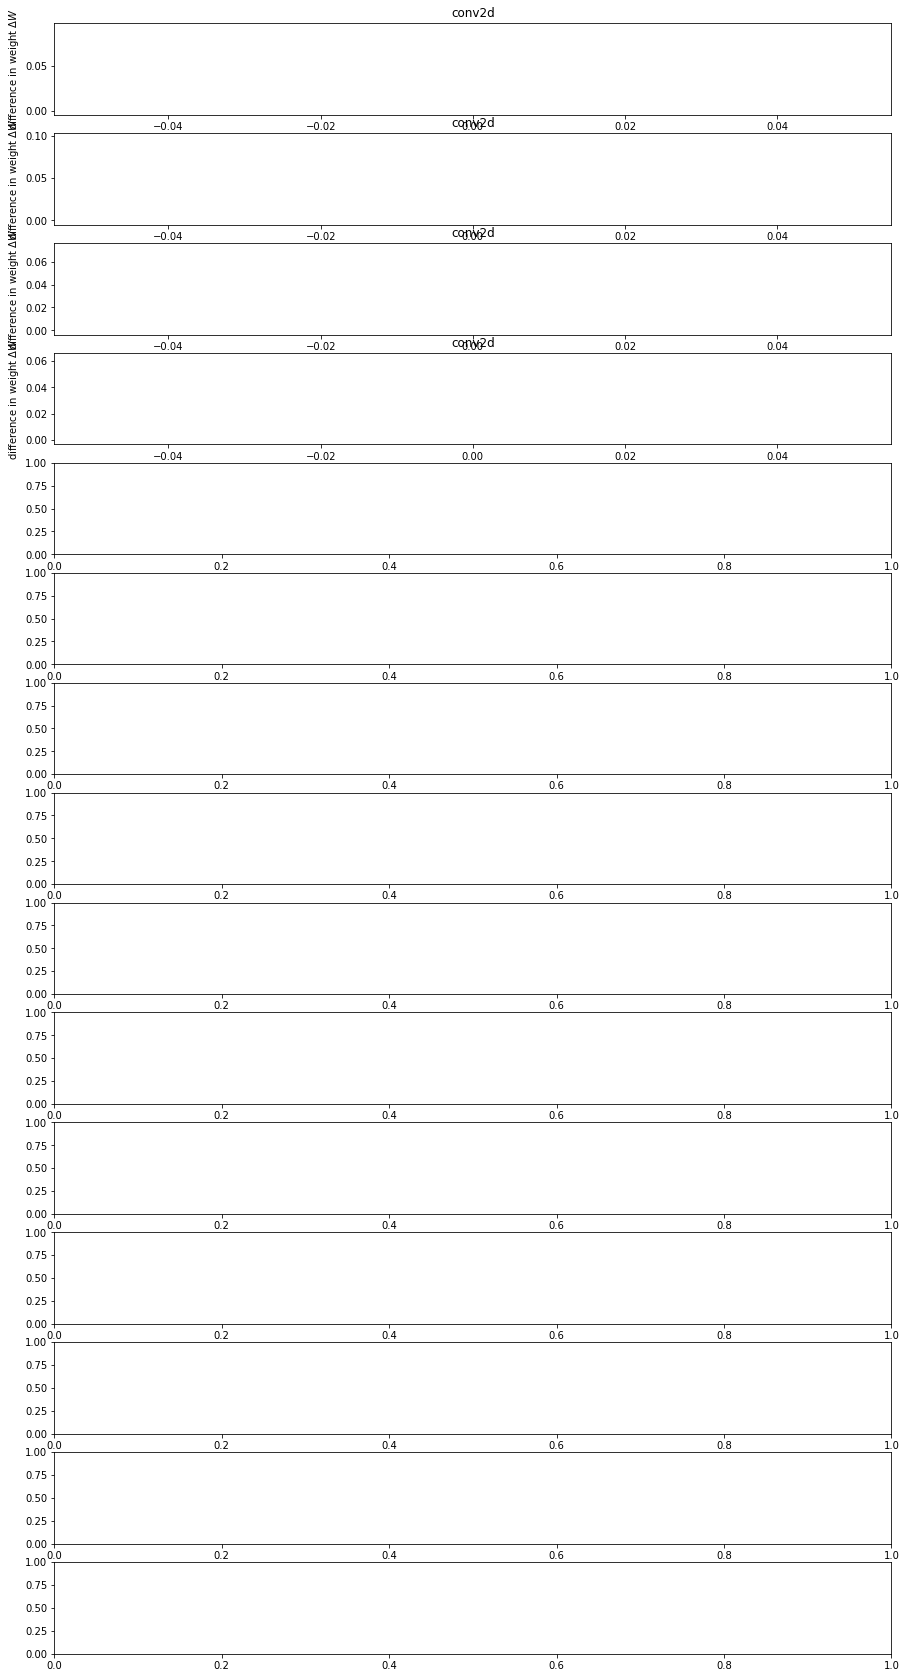

In [17]:
import progressbar
import time

for name, model in models:
    for epoch in range(0,3):
        handle = open('../'+dw_path(name) + '/byepoch/dW-{:02d}.pickle'.format(epoch), 'rb')
        dW = pickle.load(handle)


        fig, axes = plt.subplots(nrows=n_layers, ncols=1, figsize=(15, 30))
        bar = progressbar.ProgressBar(maxval=n_layers, widgets=[progressbar.Bar('=', '[', ']'), ' ', progressbar.Percentage()])
        bar.start()
        
        i = 0
        for ax, dw, layer_name in zip(axes, dW, layer_names):

            ax.plot(list(range(len(dw))), dw)
            ax.set(xlabel='weight index', ylabel='difference in weight ' + r'$\Delta W$', title=layer_name) 
            i+=1
            bar.update(i)

        fig.tight_layout()
        fig.savefig(figures_path(self.name) + 'byepoch/{}-{:02d}.png'.format(epoch), dpi=100)
        plt.close(fig)
        bar.finish()
    